# Example 10.3

(Page 267 of CE-220 Fall 2019 course reader)

In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

In [2]:
dm = em.rModel(2,3)
A = 100000
I = 60
dm.xsection('default',A,I)
dm.material('default', 1000)

n1 = dm.node('1',  0.0,  2.0)
n2 = dm.node('2',  0.0, 10.0)
n3 = dm.node('3', 10.0, 10.0)
n4 = dm.node('4', 20.0, 10.0)
n5 = dm.node('5', 20.0,  0.0)

a = dm.beam('a', n1,  n2)
b = dm.beam('b', n2,  n3)
c = dm.beam('c', n3,  n4)
d = dm.beam('d', n4,  n5)

dm.hinge(a, n1)

a.w['y'] = -5
b.w['y'] = -10

dm.fix(n1, ['x', 'y', 'rz'])
dm.fix(n5, ['x', 'y', 'rz'])

# dm.DOF = [[6, 7, 8],[1, 7, 2], [1, 3, 4], [1, 9, 5], [10, 9, 11]]
dm.DOF = dm.numdofs()

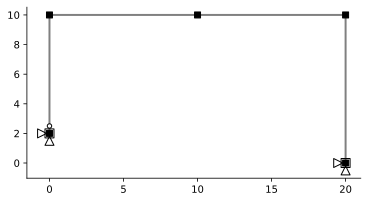

In [3]:
fig, ax = plt.subplots()
em.plot_structure(dm, ax)

## Part 1

Determine the basic forces in all elements.

In [4]:
# B = em.B_matrix(dm)
# Pw = em.Pw_vector(dm)
# Pw.f

In [5]:
Q0 = em.Q0_vector(dm)
Q0

C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.matrices.iForce_vector'> (expected <class 'str'>) for object: iForce_vector([ -0.        ,   0.        , -40.        ,  -0.        ,
                83.33333333, -83.33333333,  -0.        ,   0.        ,
                 0.        ,  -0.        ,   0.        ,   0.        ])
  FormatterWarning


iForce_vector([ -0.        ,   0.        , -40.        ,  -0.        ,
                83.33333333, -83.33333333,  -0.        ,   0.        ,
                 0.        ,  -0.        ,   0.        ,   0.        ])

In [6]:
assert abs(Q0.get('a_3') - -40.000000000) < 10e-8
assert abs(Q0.get('b_2') -  83.333333333) < 10e-8
assert abs(Q0.get('b_3') - -83.333333333) < 10e-8

NameError: name 'component' is not defined

In [ ]:
P0 = B.f@Q0 + P.wf
P0

In [ ]:
assert abs(P0.get('1') - -25) < 10e-8
assert abs(P0.get('2') -  43.33333333333) < 10e-8
assert abs(P0.get('3') -  50) < 10e-8
assert abs(P0.get('4') - -83.33333333333) < 10e-8

In [7]:
K = em.K_matrix(dm)
K.f

,$1$,$2$,$3$,$4$,$5$
$P_{1}$,1071.5625,2812.5,0.0,0.0,3600.0
$P_{2}$,2812.5000,46500.0,-3600.0,12000.0,0.0
$P_{3}$,0.0000,-3600.0,1440.0,0.0,3600.0
$P_{4}$,0.0000,12000.0,0.0,48000.0,12000.0
$P_{5}$,3600.0000,0.0,3600.0,12000.0,48000.0


In [ ]:
Uf = em.analysis.SolveDispl(dm)
Uf

In [ ]:
Qi = B.bari@(P.f - P.wf)

In [ ]:
Qi.df

In [ ]:
Q = em.Q_vector(B,Qi)

## Part 2

Determine the horizontal and vertical translation at node 3.

In [ ]:
A = em.A_matrix(dm).add_cols(['1', '5']).add_cols(['3', '6']).remove(['7']).remove(['8']).remove('frame-axial')
V = em.V_vector(A)
A.c.df

In [ ]:
F = em.F_matrix(dm)
F.s

In [ ]:
V = F.s@Q
V

In [ ]:
Uf = A.c.inv@V.c
Uf.df